**Import needed libraries**

In [1]:
import pandas as pd
import seaborn as sns
import plotly_express as px

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

## 1 - Getting started

This project will be centered around the Chicago Crime & selected Census data. Start of by downloading both datasets.

**1.1** Read through the documentation for both datasets. Do this *thoroughly*!

Chicago crime data : https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

Chicago census data : https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2



**1.2** Now download both datasets as .csv files. You get the option to download by frist clicking on the 'Export' tab. Make sure you select the data in CSV format.

Be mindful that the crime dataset is over 2GB in size, so it might take awhile to download.

Once downloaded, rename the files chicago_crime.csv & chicago_census.csv, respectively, and put them in the same folder as this notebook.

**1.3** Load data. The following reads should now work.

In [2]:
chicago_crime_2001_to_2024_df = pd.read_csv('chicago_crime.csv')
chicago_census_2008_to_2012_df = pd.read_csv('chicago_census.csv')

In [3]:
# Checking a bit of the data frame

chicago_crime_2001_to_2024_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


**1.4** The census data only contains records that apply for the period 2008-2012, while the crime dataset runs from 2001-2024. 

Therefore, begin by filtering the crime data so that you get a dataframe that contains records only for the period 2008-2012. 

*Hint*: You'll be filtering based on date quite alot in this project, and it's therefore very advisable to transform the existing *Date* column into datetime-format. 

To simplify further, you could perhaps also create new columns that indicate *Year*, *Month*, *Day* and *Hour*. 

You might also find that other types of indicator columns could be useful. Feel free to come back and add them here later.

**Important:** For the remainder of this project, we will only work with data for the year 2008-2012.

In [4]:
# Checking the date format

chicago_crime_2001_to_2024_df.head()["Date"]

0    03/18/2015 12:00:00 PM
1    12/20/2018 03:00:00 PM
2    05/01/2016 12:25:00 AM
3    12/20/2018 04:00:00 PM
4    06/01/2014 12:01:00 AM
Name: Date, dtype: object

In [5]:
# Convert the 'Date' column to datetime format

chicago_crime_2001_to_2024_df['Date'] = pd.to_datetime(chicago_crime_2001_to_2024_df["Date"])

In [6]:
# Checking that the dates have been accurately converted

chicago_crime_2001_to_2024_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,2015-03-18 12:00:00,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,2014-06-01 00:01:00,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [7]:
# Create a new dataframe with crime records only the period 2008-2012

year_2008_to_2012_filter = chicago_crime_2001_to_2024_df["Date"].dt.year.between(2008, 2012)

chicago_crime_2008_to_2012_df = chicago_crime_2001_to_2024_df[year_2008_to_2012_filter].reset_index(drop=True)

In [8]:
# Checking that the correct data is in the data frame

chicago_crime_2008_to_2012_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11645833,JC213044,2012-05-05 12:25:00,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,29.0,25.0,11,NaN,NaN,2012,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11646447,JC213946,2008-10-24 14:30:00,036XX N NARRAGANSETT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,36.0,17.0,11,NaN,NaN,2008,04/07/2019 04:05:59 PM,NaN,NaN,NaN
2,11031104,JA362043,2008-07-24 00:01:00,031XX W FILLMORE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,True,...,24.0,29.0,17,NaN,NaN,2008,07/26/2017 03:56:50 PM,NaN,NaN,NaN
3,11648237,JC216157,2012-01-01 12:00:00,115XX S CAMPBELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,19.0,75.0,11,NaN,NaN,2012,04/09/2019 04:24:58 PM,NaN,NaN,NaN
4,11648822,JC216887,2011-12-13 00:00:00,115XX S MARSHFIELD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,ATHLETIC CLUB,False,False,...,34.0,75.0,11,NaN,NaN,2011,04/09/2019 04:24:58 PM,NaN,NaN,NaN


In [9]:
# Continue checking

min_year = chicago_crime_2008_to_2012_df["Date"].dt.year.min()
max_year = chicago_crime_2008_to_2012_df["Date"].dt.year.max()
print(f"min year in 'Date': {min_year}")
print(f"max year in 'Date': {max_year}")

min year in 'Date': 2008
max year in 'Date': 2012


# 2 - Cleaning up the mess

**Note:** The rest of the problems don't really require you to finish this section - you could revisit these questions at a later time. 

Bear in mind though that the numbers you aquire in the problems ahead may or may not change a bit, depending on how you choose to treat the duplicates and missing values here.  

**2.1** How many duplicated rows are there in crime data set? If there are any, remove them.

In [ ]:
duplicated_mask = chicago_crime_2008_to_2012_df.duplicated()
chicago_crime_2008_to_2012_df[duplicated_mask]
# There are no duplicated rows in the data frame.

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


In [12]:
# HOWEVER!
# If we exclude the "ID" column from our duplicate check, we find that there are duplicated cases which can cause faulty data evaluation.

duplicated_mask = chicago_crime_2008_to_2012_df.iloc[:, 1:].duplicated()
chicago_crime_2008_to_2012_df[duplicated_mask]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
351763,20546,HV412015,2012-08-02 12:50:00,006XX N AVERS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,27.0,23.0,01A,1150610.0,1903972.0,2012,09/19/2022 03:41:05 PM,41.892398,-87.722324,"(41.892397765, -87.722323899)"
351801,19393,HS313197,2010-05-18 06:37:00,031XX W 48TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,...,14.0,58.0,01A,1156332.0,1872232.0,2010,09/01/2022 03:42:17 PM,41.805186,-87.702166,"(41.805185857, -87.702166016)"
351811,19439,HS350729,2010-06-09 13:32:00,047XX S FORRESTVILLE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,...,3.0,38.0,01A,1180728.0,1873640.0,2010,09/19/2022 03:41:05 PM,41.808523,-87.612649,"(41.808523066, -87.612648765)"
351854,20139,HT576362,2011-11-05 17:05:00,004XX E 87TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,...,6.0,44.0,01A,1180546.0,1847395.0,2011,09/19/2022 03:41:05 PM,41.736508,-87.614121,"(41.736508334, -87.614121283)"
351864,19696,HS638640,2010-11-30 00:55:00,111XX S BELL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,...,19.0,75.0,01A,1163372.0,1830862.0,2010,09/19/2022 03:41:05 PM,41.691516,-87.677503,"(41.691515662, -87.677502582)"
351933,4658,HP478965,2008-07-28 06:03:00,043XX W WRIGHTWOOD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,31.0,20.0,01A,1147194.0,1916929.0,2008,09/19/2022 03:41:05 PM,41.928019,-87.734537,"(41.928019152, -87.73453736)"
351934,4415,HP166985,2008-02-09 08:20:00,078XX S WOLCOTT AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,18.0,71.0,01A,1165051.0,1852720.0,2008,09/19/2022 03:41:05 PM,41.751462,-87.670740,"(41.751462228, -87.670739627)"
351969,19769,HT144517,2011-02-01 09:05:00,032XX W HIRSCH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,True,...,26.0,23.0,01A,1154469.0,1909126.0,2011,09/19/2022 03:41:05 PM,41.906465,-87.708013,"(41.906464536, -87.708013345)"
352043,4499,HP296582,2008-04-23 18:15:00,076XX S RHODES AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,6.0,69.0,01A,1181226.0,1854554.0,2008,09/01/2022 03:42:17 PM,41.756138,-87.611410,"(41.756137809, -87.61140996)"
352189,4380,HP101233,2008-01-01 16:48:00,024XX N MONTICELLO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,35.0,22.0,01A,1151639.0,1915923.0,2008,09/19/2022 03:41:05 PM,41.925172,-87.718230,"(41.925172259, -87.718230034)"


In [13]:
# Because of this, I decide to remove these rows from the data frame.

chicago_crime_2008_to_2012_df = chicago_crime_2008_to_2012_df[~duplicated_mask]

**2.2** What columns in the crime dataset has missing values, and how many are they?

In [14]:
column_nan_amount = {column: chicago_crime_2008_to_2012_df[column].isnull().sum() for column in chicago_crime_2008_to_2012_df.columns if chicago_crime_2008_to_2012_df[column].isnull().sum() > 0}
missing_values_df = pd.DataFrame({"Column Name": column_nan_amount.keys(), "# Of Missing Values": column_nan_amount.values()})
missing_values_df

,Column Name,# Of Missing Values
0,Location Description,1051
1,District,40
2,Ward,46
3,Community Area,854
4,X Coordinate,16327
5,Y Coordinate,16327
6,Latitude,16327
7,Longitude,16327
8,Location,16327


**2.3** Now, for all the columns with missing values you identified, chose one of the following:

        a) remove the entire row with the missing value
        b) replace the missing values with another suitable value
        c) don't do anything, leave the missing values as is

All options above are completely valid! However, I want you to, for all columns with missing values, **clearly** argue for why you chose to do what you do.

## 3 - The Birds Eye

**3.1** Do some exploratory analysis on the dataset and try to get a sense of the data you're working with.

**3.1** How many crimes records exists for the period 2008-2012, in total?

In [15]:
print(f"There are {len(chicago_crime_2008_to_2012_df)} crime records in the data frame.")

There are 1878904 crime records in the data frame.


**3.2** What's the number of recorded crimes each of the years, individually? 

In [16]:
years = chicago_crime_2008_to_2012_df["Date"].dt.year.unique()
num_records = [(chicago_crime_2008_to_2012_df["Date"].dt.year == year).sum() for year in years]

chicago_crime_yearly_records_df = pd.DataFrame({"Year": years, "# Of Records": num_records}, index=None).sort_values("Year").set_index("Year", drop=True)
chicago_crime_yearly_records_df

,# Of Records
Year,
2008,427186
2009,392842
2010,370527
2011,352012
2012,336337


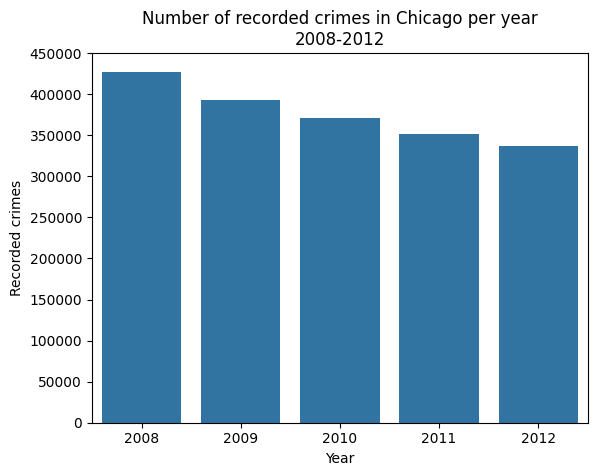

In [17]:
ax = sns.barplot(chicago_crime_yearly_records_df, x="Year", y="# Of Records")
ax.set_title("Number of recorded crimes in Chicago per year\n2008-2012")
ax.set_ylim(0, 450000)
ax.set_ylabel("Recorded crimes")
plt.show()

**3.3** Has the number of recorded crimes increased, decreased or remained stable over said period?

The total crime rate seem to be steadily decreasing over the years - as shown above.

**3.4** By how many percentage points has the crime rate increased/decreased over this period? 

Hint: You only need to compare the number of crime records from 2008 with the number of crime records from 2012.

In [18]:
crime_rate_difference = chicago_crime_yearly_records_df["# Of Records"][2008] - chicago_crime_yearly_records_df["# Of Records"][2012]
pct_decrease = crime_rate_difference/chicago_crime_yearly_records_df["# Of Records"][2008]*100
print(f"The crime rate has decreased by {pct_decrease:1.2f}% from 2008 to 2012.")

The crime rate has decreased by 21.27% from 2008 to 2012.


**3.5** Which primary crime types have increasing crime rates, and which ones have decreasing crime rates, when comparing 2008 to 2012?

In [32]:
crimes_2008_mask = chicago_crime_2008_to_2012_df["Date"].dt.year == 2008
crimes_2008_df = chicago_crime_2008_to_2012_df[crimes_2008_mask]
crime_types_2008 = pd.DataFrame(crimes_2008_df["Primary Type"].value_counts()).rename(columns={"count": "Cases 2008"})

crimes_2012_mask = chicago_crime_2008_to_2012_df["Date"].dt.year == 2012
crimes_2012_df = chicago_crime_2008_to_2012_df[crimes_2012_mask]
crime_types_2012 = pd.DataFrame(crimes_2012_df["Primary Type"].value_counts()).rename(columns={"count": "Cases 2012"})

crime_types_2008_and_2012 = pd.merge(crime_types_2008, crime_types_2012, on="Primary Type")
rate_increase_mask = (crime_types_2008_and_2012["Cases 2012"] - crime_types_2008_and_2012["Cases 2008"]) > 0
rate_decrease_mask = (crime_types_2008_and_2012["Cases 2012"] - crime_types_2008_and_2012["Cases 2008"]) < 0
rate_same_mask = (crime_types_2008_and_2012["Cases 2012"] - crime_types_2008_and_2012["Cases 2008"]) == 0
crime_types_2008_and_2012["Rate Increase/Decrease"] = ""
crime_types_2008_and_2012["Rate Increase/Decrease"][rate_increase_mask] = "Increase"
crime_types_2008_and_2012["Rate Increase/Decrease"][rate_decrease_mask] = "Decrease"
crime_types_2008_and_2012["Rate Increase/Decrease"][rate_same_mask] = "Same"
crime_types_2008_and_2012

,Cases 2008,Cases 2012,Rate Increase/Decrease
Primary Type,,,
THEFT,88437,75464,Decrease
BATTERY,75930,59133,Decrease
CRIMINAL DAMAGE,52843,35855,Decrease
NARCOTICS,46506,35489,Decrease
OTHER OFFENSE,26532,17524,Decrease
BURGLARY,26218,22844,Decrease
ASSAULT,25448,19899,Decrease
MOTOR VEHICLE THEFT,18881,16490,Decrease
ROBBERY,16703,13484,Decrease


# 4 - Chicago Police Departement performance assesment

**4.1** How many recorded crimes have in total led to an arrest? What's the corresponding arrest percentage?

**4.2** Has the arrest rate percentage been increasing, decreasing or remained stable over these years?

**4.3** For the Year 2011, which month has the highest arrest percentage?

**4.4** For the same year, and the particular month of you've identified in question 2.3, which primary crime type has the highest number of arrests?

# 5 - Troubles at home

**5.1** How many recorded crimes are domestic?

**5.2** How many domestic recorded crimes are of the primary type *offense involving children*?

**5.3** How much more likely is it that an offense involving children is domestic?

**5.4** What's the worst weekday in terms of number of domestic offenses involving children? How does it compare to the other weekdays?

**5.5** What's the distribution, in terms of number of records, for domestic crimes of sexual character that involves children? What's the arrest rate (%) for each? 

**5.6** What period of the day does the specific kind of (domestic) offense against children, with the most recorded arrests, tend do occur? How does it look for all weekdays individually?
        Can you find certain periods of the week that are especially bad? 

    Note: the details of this question is up to you to interpret

**5.7** Looking at any given year as a whole, what's the worst period in terms of domestic number of offenses involving children? Can you find any trends? Does the trend seem to be consistent for every other year? 

    Note: the details of this question is up to you to interpret

# 6 - Bad Boys Bad Boys whatcha gonna do

**6.1** In general, what weekday is a crime most likely to occur? Which day is the safest?

**6.2** Which is the most unsafe weekday for you if you'd like to avoid the following:

a) getting your phone stolen by sneaky pickpockets (THEFT) 

b) having your handbag forcibly pulled away (ROBBERY) 

c) getting jumped in an alley (ASSAULT)

**6.3** Which are the worst 10 dates (most recorded crimes) of 2008? Does this trend hold for the other years?

**6.4** From the perspective of total number of crime records, which are the Top 10 primary crime types? Which are the Bottom 10? 

Consider this question for the years 2008-2012 as a whole. 

**6.5** For all those crime categories you identified in 6.4, how does their distribution instead look per year - rather than the full 2008-2012 period as a whole?

**6.6** Which primary crime types does the city of Chicago seem to get better at preventing? For which ones is it the opposite, i.e, the situation is getting worse? 

# 7 - Night Stalker

**7.1** Are there more or less crimes reported during daytime, compared with nighttime? Daytime is considered as all hours between 06:00-18:00, nighttime is the rest of the day.

**7.2** Are there any specific primary crime types that most often occur during nights? Which ones are they?

**7.3** In general, for each weekday, how many crimes are recorded during daytime and how many during nighttime? What are the trends? Are there any weekdays that stands out somehow?

Monday, Tuesday, Wednesday, Thursday and Friday have overwhelmingly more recorded crimes during the day, than during the night.

Saturday also has more records during the day, but it's only slightly more than durnig the night.

Sunday is a trend breaker - wherein the number of recorded crimes are higher during the night, than during the night. Though not by alot.

**7.4** Does the trends you've found in 7.3 also hold if you look at each year individually?

**7.5** Are there any weekdays in which Stalking occurs more often during nighttime?

# 8 - Grand Theft Auto

**8.1** You just bought a new car. What weekday should you be most wary of as it has the highest risk for a Grand Theft Auto-style robbery (MOTOR VEHICLE THEFT)?

**8.2** For that day, where (at what location) should you absolutely avoid leave your car carelessly? Where is it seemingly safest to do so?

**8.3*** Are there certain periods of the year/month/day/time of day where GTA is more frequent?

# 9. Just send me like location

https://www.youtube.com/watch?v=k7yBJ5Ffkdo

**9.1** Are there any (geographical) areas hit particularly hard by prostitution on friday nights?

**9.2** Can you vizualise the locations from 9.1 on a map of Chicago? Is there a concentration somewhere? 

**9.3*** Can you find any geographical concentration of other crime categories? Perhaps even by weekday and or day/nighttime? Plot these on a map of Chicago. 

# 10 - The $ factor

**10.1** Merge the crime and census datasets together in a suitable way.

**10.2*** Are there certain kinds of socoeconomic area that are more prone to certain kinds of crimes? Do a deep dive in the direction you fancy yourself here.

# 11 - Your turn!

There are obviously so much more to gain by analysing these datasets. This is now your opportunity to dwelve deeper into what you yourself like.

    Instructions: think of one or several questions (as we've done above). Then, proceed with your own deep dive analysis and provide your answers.